# LSTM for Load Forecasting


## Data Spliting and Standardization

In [18]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1BqBm-QmPx_dyiBnzMM-DUucvYyuo4lI5
Data=pd.read_csv("/content/data1.csv")

data = Data[0:150000]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#rbf when c=1
y = data['Voltage']
X = data.drop(['Voltage'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)
scalar=StandardScaler()
scalar.fit(X_train)
X_train_scalar=scalar.transform(X_train)
X_test_scalar=scalar.transform(X_test)
print("Xtrain:", X_train_scalar.shape)
print("Xtest:", X_test_scalar.shape)
print("ytrain:", y_train.shape)
print("ytest:",y_test.shape)

Xtrain: (120000, 6)
Xtest: (30000, 6)
ytrain: (120000,)
ytest: (30000,)


In [1]:
# https://drive.google.com/file/d/1BqBm-QmPx_dyiBnzMM-DUucvYyuo4lI5/view?usp=sharing
!pip install --upgrade --no-cache-dir gdown
!gdown 1BqBm-QmPx_dyiBnzMM-DUucvYyuo4lI5

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1BqBm-QmPx_dyiBnzMM-DUucvYyuo4lI5
To: /content/data1.csv
100% 14.2M/14.2M [00:00<00:00, 97.3MB/s]


In [5]:
Data=pd.read_csv("/content/data1.csv")
Data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0,1,17
1,5.360,0.436,233.63,23.0,0,1,16
2,5.374,0.498,233.29,23.0,0,2,17
3,5.388,0.502,233.74,23.0,0,1,17
4,3.666,0.528,235.68,15.8,0,1,17


In [6]:
data = Data[0:150000]

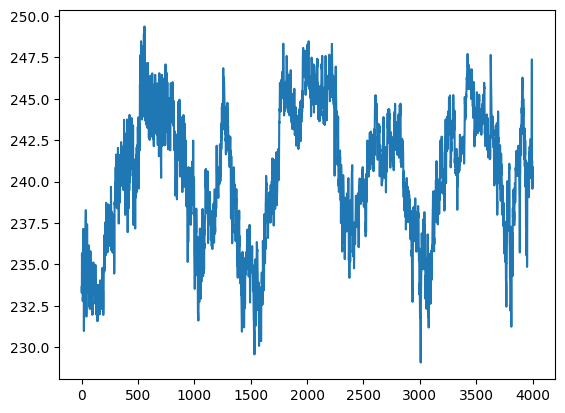

In [7]:
data['Voltage'][1:4000].plot()

plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#rbf when c=1
y = data['Voltage']
X = data.drop(['Voltage'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)
scalar=StandardScaler()
scalar.fit(X_train)
X_train_scalar=scalar.transform(X_train)
X_test_scalar=scalar.transform(X_test)
print("Xtrain:", X_train_scalar.shape)
print("Xtest:", X_test_scalar.shape)
print("ytrain:", y_train.shape)
print("ytest:",y_test.shape)

Xtrain: (120000, 6)
Xtest: (30000, 6)
ytrain: (120000,)
ytest: (30000,)


## Model training

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import math

# Install and download the data
!pip install --upgrade --no-cache-dir gdown
!gdown 1BqBm-QmPx_dyiBnzMM-DUucvYyuo4lI5
Data = pd.read_csv("/content/data1.csv")

# Use only the first 150000 rows
data = Data[0:150000]

# Separate features and target
y = data['Voltage']
X = data.drop(['Voltage'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Standardize the features
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

# Normalize the target variable
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape the features to be 3D [samples, time steps, features] for LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Make predictions
train_predict = model.predict(X_train_scaled)
test_predict = model.predict(X_test_scaled)

# Inverse transform predictions and true values
train_predict = scaler_y.inverse_transform(train_predict)
test_predict = scaler_y.inverse_transform(test_predict)
y_train = scaler_y.inverse_transform(y_train_scaled)
y_test = scaler_y.inverse_transform(y_test_scaled)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_predict)
train_rmse = math.sqrt(train_mse)
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = math.sqrt(test_mse)

print(f'Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MSE: {test_mse}, Test RMSE: {test_rmse}')


Downloading...
From: https://drive.google.com/uc?id=1BqBm-QmPx_dyiBnzMM-DUucvYyuo4lI5
To: /content/data1.csv
100% 14.2M/14.2M [00:00<00:00, 92.7MB/s]
Epoch 1/20
1500/1500 [==============================] - 12s 6ms/step - loss: 0.0384 - val_loss: 3.4049e-04
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.8282e-04 - val_loss: 2.0802e-04
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.4191e-04 - val_loss: 1.7859e-04
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.3461e-04 - val_loss: 1.8341e-04
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 1.2581e-04 - val_loss: 1.2876e-04
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 1.1860e-04 - val_loss: 1.6726e-04
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 1.1424e-04 - val_loss: 1.1256e-04
Epoch 8/20
1500/1500 [==============================] - 7s 5ms/step - loss: 1.1163e

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                11400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11451 (44.73 KB)
Trainable params: 11451 (44.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Evalution


In [32]:
from sklearn.metrics import mean_absolute_percentage_error
train_mape = mean_absolute_percentage_error(y_train, train_predict)
test_mape = mean_absolute_percentage_error(y_test, test_predict)

In [34]:
print('Train:')
print(f'MSE: {train_mse},   RMSE: {train_rmse},  MAPE: {train_mape}')
print('Test:')
print(f'MSE: {test_mse},    RMSE: {test_rmse},   MAPE: {test_mape}')


Train:
MSE: 7.274632256868921,   RMSE: 2.697152620240264,  MAPE: 0.01031660451601425
Test:
MSE: 7.233911777009279,    RMSE: 2.689593236348069,   MAPE: 0.008975953148864863


In [35]:
a=test_predict.flatten()

In [36]:
b=y_test.flatten()

Text(0.5, 1.0, 'Predicted Test data using LSTM')

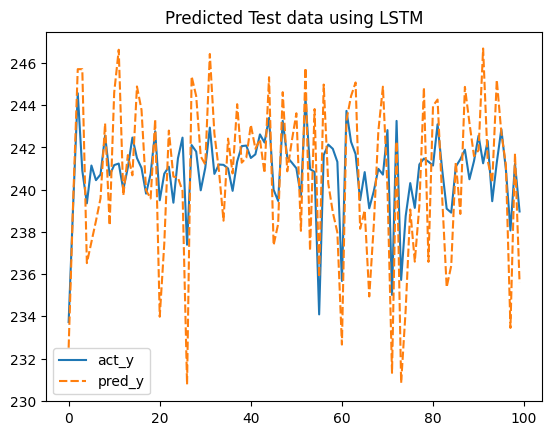

In [39]:
predict=pd.DataFrame({'act_y':a[0:100], 'pred_y':b[0:100]})
sns.lineplot(predict)
# displaying the title
plt.title("Predicted Test data using LSTM")